#Librerías que utilicé 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 
import scipy.stats as stats

In [2]:
#Aquí leo el csv llamado "data.csv"
calificaciones = pd.read_csv('data.csv',index_col=False)

In [3]:
#Muestro que mi información se haya cargado correctamente
calificaciones.head()

,participant,age:1,gender:1,salidas:1,noviazgo:1,origen:1,calificacion_mejor:1,calificacion_peor:1,antecedente_psiq:1,ndc:1,...,ndc:14,ndc:15,ndc:16,ndc:17,ndc:18,igt:1,country,TIME_start,TIME_end,TIME_total
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,18,1,2,1,2,10.0,0,2,5,...,5,5,2,2,5,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,"MX, Mexico",2020-01-15-17-29,2020-01-15-17-37,8.0
1,s.65fc217a-f4de-459f-9acb-272237a94e73.txt,20 años,1,3,2,2,82.0,5.95,1,4,...,4,4,3,2,2,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN
2,s.0742574d-2230-48f0-b795-42e1fd5d0839.txt,18,1,3,2,2,NaN,No he tenido,2,3,...,4,2,5,2,5,NaN,"MX, Mexico",2020-01-15-17-30,NaN,NaN
3,s.26328d2c-466f-467e-9860-b27601337486.txt,5,2,2,2,2,67.0,NaN,1,1,...,2,5,3,4,3,NaN,"MX, Mexico",2020-01-15-17-49,NaN,NaN
4,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,18 años,2,3,2,2,9.4,7,2,3,...,3,3,5,1,4,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,"MX, Mexico",2020-01-15-17-30,2020-01-15-17-40,10.0


Hay que considerar que en la columna de esta información no había instrucciones, por tanto, quienes no tenían calificaciones podían o no escribir números. Tampoco estaba estandarizado el formato, por ende, algunos escribireron sus calificaciones en base 10 y otros en base 100

In [6]:
#Aquí elimino aquellas entradas que no hayan sido numéricas para las calificaciones... simplemente no se pueden trabajar
calificaciones['calificacion_peor:1'] = calificaciones['calificacion_peor:1'].astype(str)
#lista de las columnas por borrar
borrar=[]
#Identifico las columnas donde aparecen valores no numéricos
for index,row in calificaciones.iterrows():
    if ('n' or 'N') in calificaciones['calificacion_peor:1'][index]:
        borrar.append(index)

#Borro todas las columnas que no me sirven
calificaciones = calificaciones.drop(borrar,axis=0)        
calificaciones['calificacion_peor:1'] = calificaciones['calificacion_peor:1'].astype(float)

In [8]:
#Checo si me libré de todas las entradas no numéricas en la columna de peores calificaciones
calificaciones.head()

,participant,age:1,gender:1,salidas:1,noviazgo:1,origen:1,calificacion_mejor:1,calificacion_peor:1,antecedente_psiq:1,ndc:1,...,ndc:14,ndc:15,ndc:16,ndc:17,ndc:18,igt:1,country,TIME_start,TIME_end,TIME_total
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,18,1,2,1,2,10.0,0.00,2,5,...,5,5,2,2,5,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,"MX, Mexico",2020-01-15-17-29,2020-01-15-17-37,8.0
1,s.65fc217a-f4de-459f-9acb-272237a94e73.txt,20 años,1,3,2,2,82.0,5.95,1,4,...,4,4,3,2,2,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN
4,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,18 años,2,3,2,2,9.4,7.00,2,3,...,3,3,5,1,4,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,"MX, Mexico",2020-01-15-17-30,2020-01-15-17-40,10.0
5,s.71755364-47a2-475b-affb-fda6465de62e.txt,19,1,3,2,2,9.4,4.00,2,2,...,3,3,3,2,4,igt.2020-01-15-1757.data.71755364-47a2-475b-af...,"MX, Mexico",2020-01-15-17-49,2020-01-15-17-57,8.0
6,s.987d9fcf-3633-4b29-89da-62276b333498.txt,20,2,1,2,2,97.0,83.00,2,4,...,5,3,1,3,5,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN


In [9]:
#Aqui le doy el formato adecuado a todas las calificaciones... lo que necesito es dejarlas en base 100
for index, row in calificaciones.iterrows():
    if calificaciones['calificacion_peor:1'][index] <= 10:
        calificaciones['calificacion_peor:1'][index] = calificaciones['calificacion_peor:1'][index]*10

In [10]:
#checo si quedaron con el mismo formato
calificaciones.head()

,participant,age:1,gender:1,salidas:1,noviazgo:1,origen:1,calificacion_mejor:1,calificacion_peor:1,antecedente_psiq:1,ndc:1,...,ndc:14,ndc:15,ndc:16,ndc:17,ndc:18,igt:1,country,TIME_start,TIME_end,TIME_total
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,18,1,2,1,2,10.0,0.0,2,5,...,5,5,2,2,5,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,"MX, Mexico",2020-01-15-17-29,2020-01-15-17-37,8.0
1,s.65fc217a-f4de-459f-9acb-272237a94e73.txt,20 años,1,3,2,2,82.0,59.5,1,4,...,4,4,3,2,2,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN
4,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,18 años,2,3,2,2,9.4,70.0,2,3,...,3,3,5,1,4,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,"MX, Mexico",2020-01-15-17-30,2020-01-15-17-40,10.0
5,s.71755364-47a2-475b-affb-fda6465de62e.txt,19,1,3,2,2,9.4,40.0,2,2,...,3,3,3,2,4,igt.2020-01-15-1757.data.71755364-47a2-475b-af...,"MX, Mexico",2020-01-15-17-49,2020-01-15-17-57,8.0
6,s.987d9fcf-3633-4b29-89da-62276b333498.txt,20,2,1,2,2,97.0,83.0,2,4,...,5,3,1,3,5,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN


In [11]:
#Reinicio la cuenta del index
calificaciones = calificaciones.reset_index(drop=True)
#Muestro mi data
calificaciones.head()

,participant,age:1,gender:1,salidas:1,noviazgo:1,origen:1,calificacion_mejor:1,calificacion_peor:1,antecedente_psiq:1,ndc:1,...,ndc:14,ndc:15,ndc:16,ndc:17,ndc:18,igt:1,country,TIME_start,TIME_end,TIME_total
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,18,1,2,1,2,10.0,0.0,2,5,...,5,5,2,2,5,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,"MX, Mexico",2020-01-15-17-29,2020-01-15-17-37,8.0
1,s.65fc217a-f4de-459f-9acb-272237a94e73.txt,20 años,1,3,2,2,82.0,59.5,1,4,...,4,4,3,2,2,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN
2,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,18 años,2,3,2,2,9.4,70.0,2,3,...,3,3,5,1,4,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,"MX, Mexico",2020-01-15-17-30,2020-01-15-17-40,10.0
3,s.71755364-47a2-475b-affb-fda6465de62e.txt,19,1,3,2,2,9.4,40.0,2,2,...,3,3,3,2,4,igt.2020-01-15-1757.data.71755364-47a2-475b-af...,"MX, Mexico",2020-01-15-17-49,2020-01-15-17-57,8.0
4,s.987d9fcf-3633-4b29-89da-62276b333498.txt,20,2,1,2,2,97.0,83.0,2,4,...,5,3,1,3,5,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN


In [12]:
#Asigno los nombres que quiero
columnas = {'ndc:1':'uno','ndc:2':'dos','ndc:3':'tres','ndc:4':'cuatro','ndc:5':'cinco','ndc:6':'seis','ndc:7':'siete',
           'ndc:8':'ocho','ndc:9':'nueve','ndc:10':'diez','ndc:11':'once','ndc:12':'doce','ndc:13':'trece',
           'ndc:14':'catorce','ndc:15':'quince','ndc:16':'dieciseis','ndc:17':'diecisiete','ndc:18':'dieciocho'}
#Renombro las columnas
calificaciones = calificaciones.rename(columns=columnas)
#Muestro mi dataset con las columnas renombradas
calificaciones.head(5)

,participant,age:1,gender:1,salidas:1,noviazgo:1,origen:1,calificacion_mejor:1,calificacion_peor:1,antecedente_psiq:1,uno,...,catorce,quince,dieciseis,diecisiete,dieciocho,igt:1,country,TIME_start,TIME_end,TIME_total
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,18,1,2,1,2,10.0,0.0,2,5,...,5,5,2,2,5,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,"MX, Mexico",2020-01-15-17-29,2020-01-15-17-37,8.0
1,s.65fc217a-f4de-459f-9acb-272237a94e73.txt,20 años,1,3,2,2,82.0,59.5,1,4,...,4,4,3,2,2,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN
2,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,18 años,2,3,2,2,9.4,70.0,2,3,...,3,3,5,1,4,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,"MX, Mexico",2020-01-15-17-30,2020-01-15-17-40,10.0
3,s.71755364-47a2-475b-affb-fda6465de62e.txt,19,1,3,2,2,9.4,40.0,2,2,...,3,3,3,2,4,igt.2020-01-15-1757.data.71755364-47a2-475b-af...,"MX, Mexico",2020-01-15-17-49,2020-01-15-17-57,8.0
4,s.987d9fcf-3633-4b29-89da-62276b333498.txt,20,2,1,2,2,97.0,83.0,2,4,...,5,3,1,3,5,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN


In [13]:
#Excluyo para que solo me queden ahora las columnas de las calificaciones y las respuestas del test
calificaciones = calificaciones[['calificacion_peor:1','uno','dos','tres','cuatro','cinco','seis',
                                'siete','ocho','nueve','diez','once','doce','trece','catorce','quince',
                                'dieciseis','diecisiete','dieciocho']]

In [14]:
#Aquí calculo el promedio de respuesta del TNC por alumno 
calificaciones['Promedio tnc'] = (calificaciones['uno'] + calificaciones['dos'] + calificaciones['tres']+calificaciones['cuatro']+
                                 calificaciones['cinco']+calificaciones['seis']+calificaciones['siete']+calificaciones['ocho']
                                 +calificaciones['nueve']+calificaciones['diez']+calificaciones['once']+calificaciones['doce']
                                 +calificaciones['trece']+calificaciones['catorce']+calificaciones['quince']
                                 +calificaciones['dieciseis']+calificaciones['diecisiete']+calificaciones['dieciocho'])/18

In [15]:
#Muestro mi data ya con mi columna nueva del promedio del tnc
calificaciones.head()

,calificacion_peor:1,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,diez,once,doce,trece,catorce,quince,dieciseis,diecisiete,dieciocho,Promedio tnc
0,0.0,5,4,1,2,1,5,2,3,1,5,5,2,3,5,5,2,2,5,3.222222
1,59.5,4,4,2,4,3,2,2,1,2,4,4,2,5,4,4,3,2,2,3.000000
2,70.0,3,3,3,1,1,3,1,3,2,3,3,1,1,3,3,5,1,4,2.444444
3,40.0,2,3,2,3,2,3,2,3,3,4,3,2,3,3,3,3,2,4,2.777778
4,83.0,4,5,1,1,1,5,1,2,2,4,3,1,3,5,3,1,3,5,2.777778


In [18]:
#Clasifico por grupo
calificaciones['Grupo'] = 0
for index, row in calificaciones.iterrows():
    if ((calificaciones['calificacion_peor:1'][index]>=0) & (calificaciones['calificacion_peor:1'][index]<=70)):
        calificaciones['Grupo'][index] = 'Grupo 1'
    if ((calificaciones['calificacion_peor:1'][index]>70) & (calificaciones['calificacion_peor:1'][index]<=80)):
        calificaciones['Grupo'][index] = 'Grupo 2'
    if ((calificaciones['calificacion_peor:1'][index]>80) & (calificaciones['calificacion_peor:1'][index]<=90)):
        calificaciones['Grupo'][index] = 'Grupo 3'
    if ((calificaciones['calificacion_peor:1'][index]>90) & (calificaciones['calificacion_peor:1'][index]<=100)):
        calificaciones['Grupo'][index] = 'Grupo 4'

In [19]:
calificaciones.head()

,calificacion_peor:1,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,...,once,doce,trece,catorce,quince,dieciseis,diecisiete,dieciocho,Promedio tnc,Grupo
0,0.0,5,4,1,2,1,5,2,3,1,...,5,2,3,5,5,2,2,5,3.222222,Grupo 1
1,59.5,4,4,2,4,3,2,2,1,2,...,4,2,5,4,4,3,2,2,3.000000,Grupo 1
2,70.0,3,3,3,1,1,3,1,3,2,...,3,1,1,3,3,5,1,4,2.444444,Grupo 1
3,40.0,2,3,2,3,2,3,2,3,3,...,3,2,3,3,3,3,2,4,2.777778,Grupo 1
4,83.0,4,5,1,1,1,5,1,2,2,...,3,1,3,5,3,1,3,5,2.777778,Grupo 3


In [20]:
#Segmentación de grupos hacia nuevos dataframes
grupo_1 = calificaciones[calificaciones.Grupo=='Grupo 1']
grupo_2 = calificaciones[calificaciones.Grupo=='Grupo 2']
grupo_3= calificaciones[calificaciones.Grupo=='Grupo 3']
grupo_4 = calificaciones[calificaciones.Grupo=='Grupo 4']

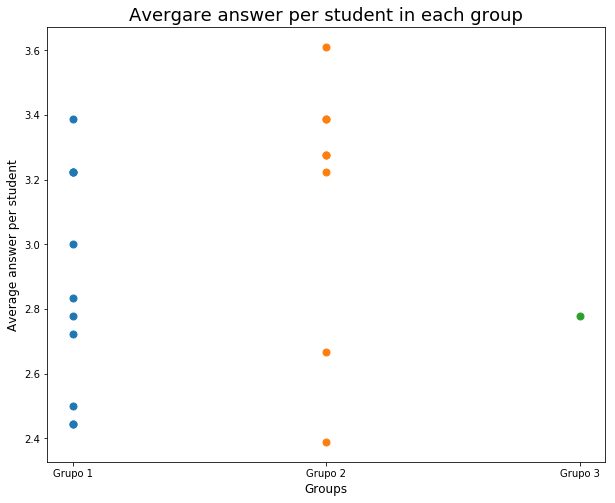

In [25]:
plt.figure(figsize=(10,8))
plt.plot(grupo_1.Grupo, grupo_1['Promedio tnc'],'.',markersize=14)
plt.plot(grupo_2.Grupo, grupo_2['Promedio tnc'],'.',markersize=14)
plt.plot(grupo_3.Grupo, grupo_3['Promedio tnc'],'.',markersize=14)
plt.plot(grupo_4.Grupo, grupo_4['Promedio tnc'],'.',markersize=14)
plt.title('Avergare answer per student in each group',fontsize=18)
plt.xlabel('Groups',fontsize=12)
plt.ylabel('Average answer per student',fontsize=12)
plt.show()

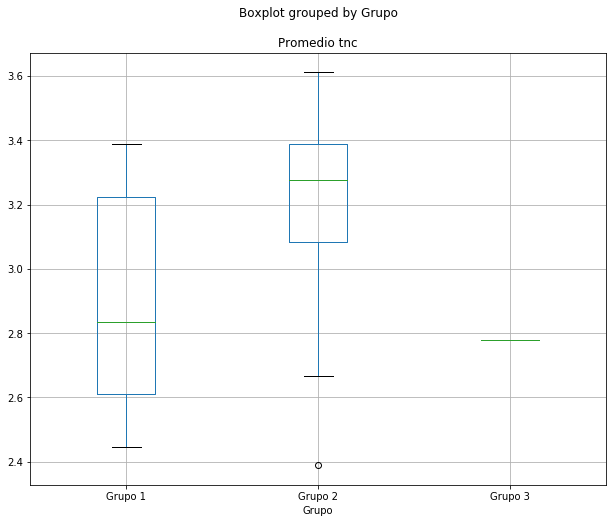

In [26]:
calificaciones.boxplot('Promedio tnc',by='Grupo',figsize=(10,8))
plt.show()

In [28]:
stats.f_oneway(grupo_1['Promedio tnc'],grupo_2['Promedio tnc'],grupo_3['Promedio tnc'])

F_onewayResult(statistic=1.3291312867406915, pvalue=0.2908588034217991)

Suponiendo entonces la hipótesis nula como: No hay diferencias significativas en las calificaciones del test al separar a los participantes acorde a sus calificaciones, podemos decir después de la comprobación, que no hay evidencias para descartar dicha hipótesis 